# 腫瘍が良性か悪性かを予測する

## モデル比較

今回は、腫瘍が良性か悪性かを分類する機械学習プログラム作成

今回はサポートベクトル（`SVC`）及びtensorflowを使いどちらが精度がいいか検証を行う。

## 学習に使うデータセットをインポートする

`breast_cancer_wisconsin_data.csv` を使用

In [2]:
# breast_cancer_wisconsin_data.csv を取り込む
import numpy as np
import pandas as pd
breast_data = pd.read_csv("breast_cancer_wisconsin_data.csv")


# 先頭の5行のみ表示
breast_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# X と y を作成する（命令を追記すること）
X = breast_data.radius_mean
y = breast_data.diagnosis

In [4]:
print(X)
print(y)

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [5]:
X = np.array(breast_data.loc[:, ["radius_mean"]])
y = np.array(breast_data.loc[:, ["diagnosis"]])

In [6]:
# カテゴリ値の数値化
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["B", "M"])                         # 良性：0, 悪性：1
y = le.transform(y.flatten())

# 数値化した状態を確認してみる
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [8]:
# 訓練データ7割、テストデータ3割に分割する 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [9]:
# SVCの分類モデルを作成
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

from sklearn.svm import SVC
classifier = SVC(kernel = "linear", gamma = "scale")
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
# 訓練データを回帰モデルに設定
y_pred = classifier.predict(X_test)

In [11]:
# テストデータを使って分類を実行
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [12]:
# 予測値を表示
print(y_test)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [13]:
# 実際の値を表示
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.8654970760233918


予測の精度を混合行列で示したり、正答率を表示したりしてみます。

In [14]:
# 混同行列で集計結果を表示
print(metrics.confusion_matrix(y_test, y_pred))

[[101   3]
 [ 20  47]]


In [16]:
# 正答率を表示
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       104
           1       0.94      0.70      0.80        67

    accuracy                           0.87       171
   macro avg       0.89      0.84      0.85       171
weighted avg       0.88      0.87      0.86       171



### tensorflowを使用して検証を行う

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from datetime import datetime

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, LSTM, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_squared_error, classification_report



# データの分割
from sklearn.model_selection import train_test_split


# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None
breast_data = pd.read_csv("breast_cancer_wisconsin_data.csv")


# 先頭の5行のみ表示する（命令を追記すること）
breast_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
# diagnosisにダミー変数追加
breast_data_1 = pd.get_dummies(data=breast_data, columns=['diagnosis'])
breast_data_1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [20]:
# X と y を作成する（命令を追記すること）
# 良性:0、悪性:1 今回はdiagnosis_Mを目的変数とする
# "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean"も説明変数に追加
X = breast_data_1[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean"]]
y = breast_data_1["diagnosis_M"]

In [21]:
# 形状確認
print(X.shape)
print(y.shape)

(569, 6)
(569,)


In [22]:
# カテゴリー変数への展開
from tensorflow.keras.utils import to_categorical

y1 = to_categorical(y)

In [24]:
# 形状確認
print(X.shape)
print(y1.shape)

(569, 6)
(569, 2)


In [25]:
# データの分割  7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, y1, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [26]:
# 形状確認
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)
print("X_valid:", X_valid.shape, "Y_valid:", Y_valid.shape)

X_train: (278, 6) Y_train: (278, 2)
X_test: (171, 6) Y_test: (171, 2)
X_valid: (120, 6) Y_valid: (120, 2)


In [27]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(32, activation='relu', input_shape=(6,)))

# 隠れ層
model.add(Dense(16, activation='relu'))

# 出力層
model.add(Dense(2, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 786
Trainable params: 786
Non-trainable params: 0
_________________________________________________________________


In [29]:
%%time

log = model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        min_delta=0, patience=100, 
                                                         verbose=1)],
               validation_data=(X_valid, Y_valid))

Epoch 1/100
9/9 [==============================] - 0s 27ms/step - loss: 41.5655 - accuracy: 0.6079 - val_loss: 0.6430 - val_accuracy: 0.8667
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.9000 - accuracy: 0.7626 - val_loss: 1.2390 - val_accuracy: 0.6000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 2.1884 - accuracy: 0.6547 - val_loss: 0.4009 - val_accuracy: 0.9000
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 1.6835 - accuracy: 0.6942 - val_loss: 2.4037 - val_accuracy: 0.5250
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 1.2815 - accuracy: 0.7302 - val_loss: 2.2426 - val_accuracy: 0.7167
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 2.8653 - accuracy: 0.5719 - val_loss: 0.8250 - val_accuracy: 0.7833
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.8713 - accuracy: 0.8129 - val_loss: 1.7445 - val_accuracy: 0.6167
Epoch 8/100
9/9 [========

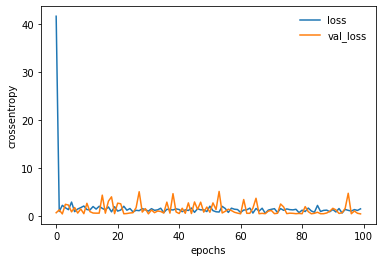

In [30]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')          #学習データ
plt.plot(log.history['val_loss'], label='val_loss')  #検証データ
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [31]:
# 予測
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)
Y_test_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [33]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       108
           1       0.88      0.84      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=Y_test_, y_pred=Y_pred)
print("予測率:", accuracy*100, "%")

予測率: 90.05847953216374 %


In [39]:
# SVCでの結果
from sklearn import metrics

accuracy_svc = metrics.accuracy_score(y_test, y_pred)

# tensorflowでの結果
from sklearn.metrics import accuracy_score
accuracy_tf = accuracy_score(y_true=Y_test_, y_pred=Y_pred)

print("予測率(svc):", round(accuracy_svc*100), "%")
print("予測率(tf):", round(accuracy_tf*100), "%")

予測率(svc): 87.0 %
予測率(tf): 90.0 %


結果
⇒tensorflowの方が3%程制度向上することが出来た。